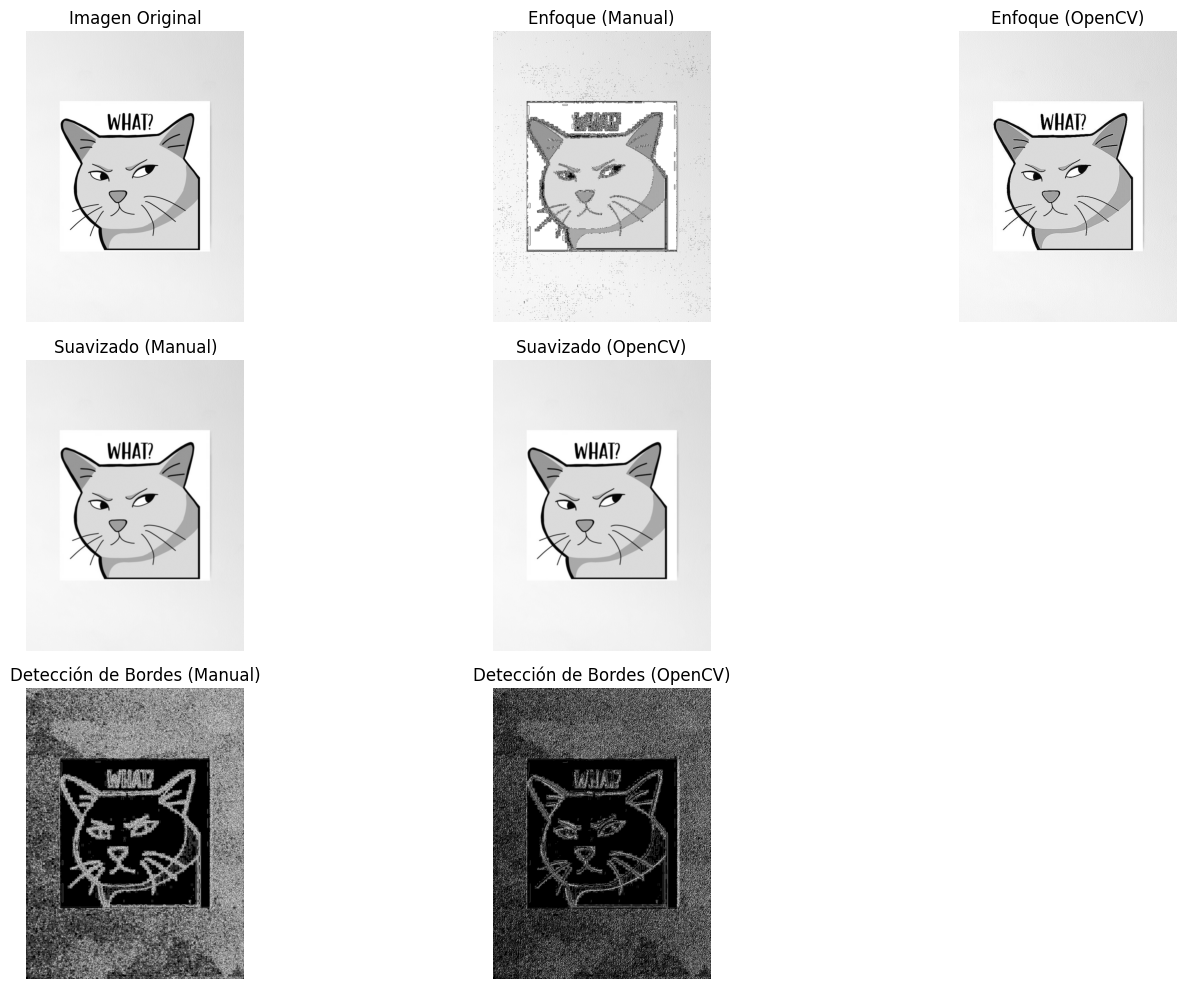

Diferencia media en enfoque: 10.0427
Diferencia media en suavizado: 0.3825
Diferencia media en detección de bordes: 2.4217


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen y convertir a escala de grises
imagen = cv2.imread('image.png')
if len(imagen.shape) == 3:
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
else:
    imagen_gris = imagen.copy()

# Función para aplicar convolución 2D manualmente
def convolucion_manual(imagen, kernel):
    # Obtener dimensiones
    alto_img, ancho_img = imagen.shape
    alto_k, ancho_k = kernel.shape
    
    # Calcular padding
    pad_y = alto_k // 2
    pad_x = ancho_k // 2
    
    # Crear imagen con padding
    imagen_pad = np.pad(imagen, ((pad_y, pad_y), (pad_x, pad_x)), mode='reflect')
    
    # Crear imagen de salida
    salida = np.zeros_like(imagen)
    
    # Aplicar convolución
    for y in range(alto_img):
        for x in range(ancho_img):
            # Extraer región de interés
            roi = imagen_pad[y:y+alto_k, x:x+ancho_k]
            # Aplicar kernel y sumar
            salida[y, x] = np.sum(roi * kernel)
    
    return salida

# Definir kernels
# Kernel de enfoque (sharpening)
kernel_enfoque = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Kernel de suavizado (blur)
kernel_suavizado = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

# Kernel de detección de bordes (Sobel horizontal + vertical)
kernel_sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

kernel_sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

# Aplicar convoluciones manualmente
enfoque_manual = convolucion_manual(imagen_gris, kernel_enfoque)
suavizado_manual = convolucion_manual(imagen_gris, kernel_suavizado)

# Para detección de bordes, combinamos Sobel X y Y
sobel_x_manual = convolucion_manual(imagen_gris, kernel_sobel_x)
sobel_y_manual = convolucion_manual(imagen_gris, kernel_sobel_y)
bordes_manual = np.sqrt(np.square(sobel_x_manual) + np.square(sobel_y_manual))
bordes_manual = np.uint8(np.clip(bordes_manual, 0, 255))

# Aplicar convoluciones con OpenCV
enfoque_opencv = cv2.filter2D(imagen_gris, -1, kernel_enfoque)
suavizado_opencv = cv2.filter2D(imagen_gris, -1, kernel_suavizado)
sobel_x_opencv = cv2.filter2D(imagen_gris, -1, kernel_sobel_x)
sobel_y_opencv = cv2.filter2D(imagen_gris, -1, kernel_sobel_y)
bordes_opencv = np.sqrt(np.square(sobel_x_opencv) + np.square(sobel_y_opencv))
bordes_opencv = np.uint8(np.clip(bordes_opencv, 0, 255))

# Visualizar resultados
plt.figure(figsize=(15, 10))

# Imagen original
plt.subplot(3, 3, 1)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Enfoque
plt.subplot(3, 3, 2)
plt.imshow(enfoque_manual, cmap='gray')
plt.title('Enfoque (Manual)')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(enfoque_opencv, cmap='gray')
plt.title('Enfoque (OpenCV)')
plt.axis('off')

# Suavizado
plt.subplot(3, 3, 4)
plt.imshow(suavizado_manual, cmap='gray')
plt.title('Suavizado (Manual)')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(suavizado_opencv, cmap='gray')
plt.title('Suavizado (OpenCV)')
plt.axis('off')

# Detección de bordes
plt.subplot(3, 3, 7)
plt.imshow(bordes_manual, cmap='gray')
plt.title('Detección de Bordes (Manual)')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(bordes_opencv, cmap='gray')
plt.title('Detección de Bordes (OpenCV)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Calcular diferencia entre implementaciones
diff_enfoque = np.abs(enfoque_manual.astype(np.float32) - enfoque_opencv.astype(np.float32))
diff_suavizado = np.abs(suavizado_manual.astype(np.float32) - suavizado_opencv.astype(np.float32))
diff_bordes = np.abs(bordes_manual.astype(np.float32) - bordes_opencv.astype(np.float32))

print(f"Diferencia media en enfoque: {np.mean(diff_enfoque):.4f}")
print(f"Diferencia media en suavizado: {np.mean(diff_suavizado):.4f}")
print(f"Diferencia media en detección de bordes: {np.mean(diff_bordes):.4f}")
